# Importing neccessary libraries

In [7]:
#Refer to the code "Plot - No. of encounters every week for a given patient" for more explaination to initial steps
from xml.etree.ElementTree import parse
from pandas import DataFrame

# Reading the input XML file of a given patient and obtaining a pointer to it

In [8]:
doc = parse('generated-data\patient-613876.fhir-bundle.xml')

# Extracting all the encounter dates from the input file

In [9]:
encounter_dates = []
for encounter in doc.findall('.//{http://hl7.org/fhir}Encounter'):
    period = encounter.find('{http://hl7.org/fhir}period')
    start_date = period.find('{http://hl7.org/fhir}start')
    encounter_dates.append(start_date.get('value'))

# Extracting both the blood pressures from the input file

In [10]:
"""
If you have a look at the input file, the format/structure in which both the blood pressures are stored, is as follows:
<entry ...>
    <Observation ...>
        <text>
            <status .../>
            <div ...>1998-08-26: Systolic blood pressure = 121 mm[Hg]</div>
                                        or
            <div ...>1998-08-26: Diastolic blood pressure = 76 mm[Hg]</div>
        </text>
        <name>...</name>
        <valueQuantity>
            <value value="76.0"/>
            ...
        </valueQuantity>
        ...
    </Observation>
</entry>
"""
systolic_bps = [] #List to store all the systolic blood pressures
diastolic_bps = [] #List to store all the diastolic blood pressures
for observation in doc.findall('.//{http://hl7.org/fhir}Observation'): #Iterating through all the 'Observation' child elements in the file
    text_ele = observation.find('{http://hl7.org/fhir}text') #Finding the 'text' child element in each of the 'Observation' elements
    div = text_ele.find('{http://www.w3.org/1999/xhtml}div') #Finding the 'div' child element in the 'text' element
    if div.text.find('Systolic') != -1: #If the text of the 'text' element has one of the words "Systolic", then we get its value
        value_quant = observation.find('{http://hl7.org/fhir}valueQuantity') #We find the element 'valueQuantity' which is the child
                                                                             #element of 'Observation' element
        value = value_quant.find('{http://hl7.org/fhir}value') #The child element 'value' of 'valueQuantity' contains the value of sys bp
        systolic_bps.append(value.get('value')) #Collecting all the sys bp in its list, by accessing the value attribute of 'value' element
    if div.text.find('Diastolic') != -1: #Else if the text of the 'text' element has one of the words "Diastolic", then we get its value
        value_quant = observation.find('{http://hl7.org/fhir}valueQuantity') #Same as above
        value = value_quant.find('{http://hl7.org/fhir}value')
        diastolic_bps.append(value.get('value')) #Collecting all the dias bp in its list, by accessing the value attribute of 'value' element

In [11]:
#Creating a dict out of the three lists
enc_dict = {}
enc_dict['encounter_date'] = encounter_dates
enc_dict['systolic_bp'] = systolic_bps
enc_dict['diastolic_bp'] = diastolic_bps

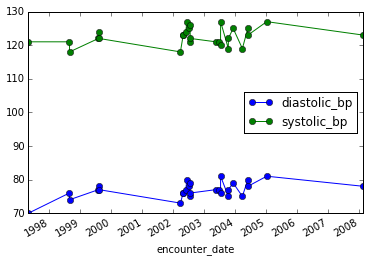

In [16]:
#Converting the dict to Pandas DataFrame structure for easy plotting
encounters = DataFrame(enc_dict, columns=['encounter_date', 'diastolic_bp', 'systolic_bp'])
#Converting the columns into appropriate standard data types, dates to date and numeric quantities to numeric data type
encounters = encounters.convert_objects(convert_dates='coerce', convert_numeric=True)
#Reindexing the dataframe with 'encounter_date' as the index
encounters.set_index(['encounter_date'],inplace=True)
#Plot graph to show the result
encounters.plot(x_compat=True,marker='o')